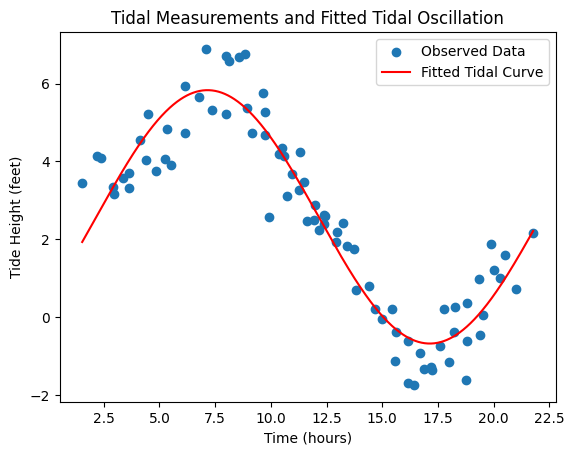

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Reading data from the data file
file_path = 'ASTR19_S22_group_project_data.txt'
data_set = np.loadtxt(file_path, skiprows=1, usecols=(0, 1, 2), dtype={'names': ('d', 't', 'th'), 'formats': ('i4', 'U5', 'f8')}) # d = day, t = time, th = tide height

# Extracting day, time, and tide height from the data
days_data = data_set['d']
times_data = np.array([int(entry.split(':')[0]) + int(entry.split(':')[1])/60 for entry in data_set['t']])
tide_heights_data = data_set['th']

# Defining an oscillatory function
def tidal_oscillation(t, amplitude, angular_frequency, phase_shift, constant_offset):
    return amplitude * np.sin(angular_frequency * t + phase_shift) + constant_offset

# Initialing guess for the parameters
initial_parameters = [4, 2 * np.pi / 24, 0, 0]

# Defining the root mean squared experimental error
rmse_value = 0.25

# Fitting the model to the data with the specified error
fitted_params, covariance_matrix = curve_fit(tidal_oscillation, times_data, tide_heights_data, p0=initial_parameters, sigma=np.full_like(tide_heights_data, rmse_value))

# Generating time points for the fitted curve
fitted_times = np.linspace(min(times_data), max(times_data), 1000)

# Ploting the original data and the fitted curve
plt.scatter(times_data, tide_heights_data, label='Observed Data')
plt.plot(fitted_times, tidal_oscillation(fitted_times, *fitted_params), 'r-', label='Fitted Tidal Curve')

plt.xlabel('Time (hours)')
plt.ylabel('Tide Height (feet)')
plt.title('Tidal Measurements and Fitted Tidal Oscillation')
plt.legend()


plt.savefig('fitted_tidal_plot.pdf')

plt.show()


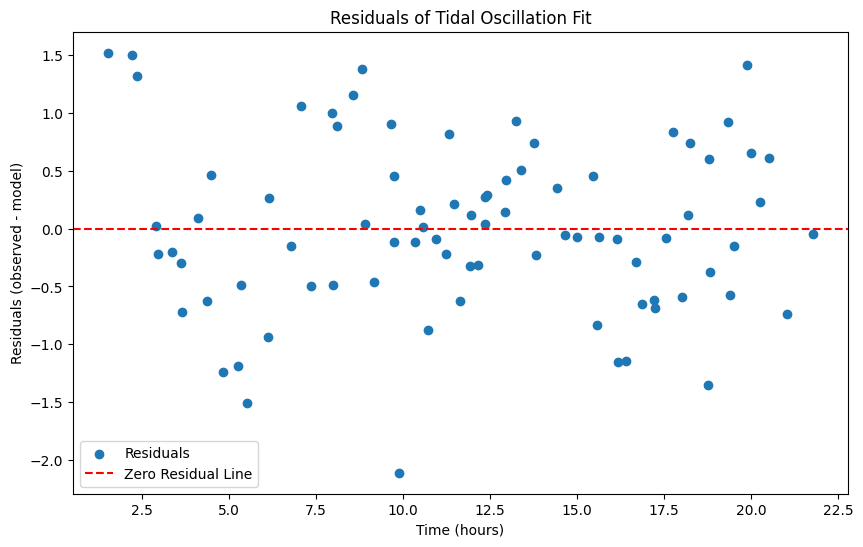

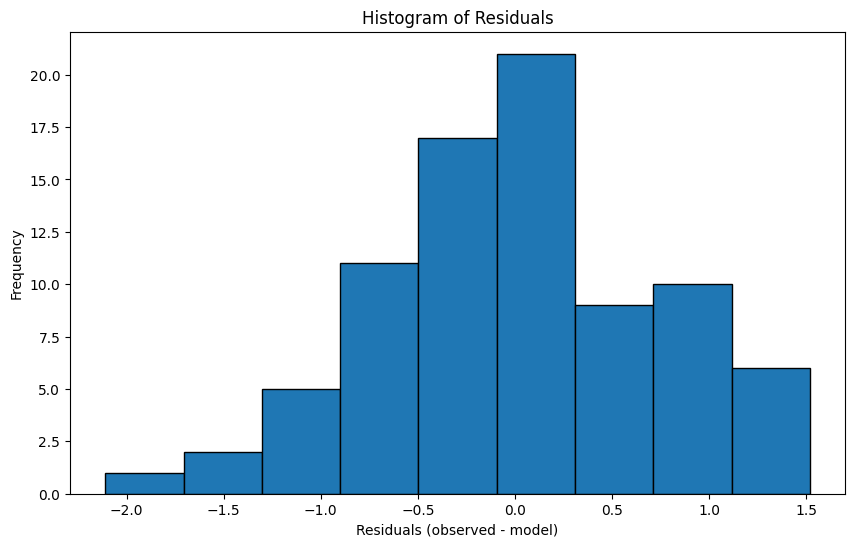

Standard Deviation of Residuals: 0.7342740162514262
The scatter in the data is larger than the assumed experimental error.
Estimated Intrinsic Scatter in the Data: 0.6904044690918504


In [6]:
# Calculating residuals
residuals = tide_heights_data - tidal_oscillation(times_data, *fitted_params)

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(times_data, residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')

plt.xlabel('Time (hours)')
plt.ylabel('Residuals (observed - model)')
plt.title('Residuals of Tidal Oscillation Fit')
plt.legend()

plt.savefig('residuals_plot.pdf')
plt.show()

# Plotting histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins='auto', edgecolor='black')
plt.xlabel('Residuals (observed - model)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

plt.savefig('residuals_histogram.pdf')
plt.show()

# Calculating and printing standard deviation of residuals
residuals_std = np.std(residuals)
print(f"Standard Deviation of Residuals: {residuals_std}")

# Assessing if scatter is larger than assumed experimental error
if residuals_std > rmse_value:
    print("The scatter in the data is larger than the assumed experimental error.")
else:
    print("The scatter in the data is within the assumed experimental error.")

# Estimating intrinsic scatter in the data
intrinsic_scatter = np.sqrt(residuals_std**2 - rmse_value**2)
print(f"Estimated Intrinsic Scatter in the Data: {intrinsic_scatter}")